In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans

In [8]:
from utils import processed_data_dirs, plots_dir, titles
titles, plots_dir

(['MP (C)', 'BP (C)', 'VP (kPa @25C)', 'P$_c$ (MPa)', 'T$_c$ (K)'],
 PosixPath('/Users/aravindhnivas/Documents/ML-properties/plots'))

In [2]:
def load_and_preprocess(file_path):
    """
    Load and preprocess the molecular vectors from .npy file
    """
    # Load the embedded vectors
    mol_vectors = np.load(file_path)
    
    # Standardize the features
    scaler = StandardScaler()
    mol_vectors_scaled = scaler.fit_transform(mol_vectors)
    
    return mol_vectors_scaled

def perform_dimensionality_reduction(data, method='pca', perplexity=30):
    """
    Reduce dimensionality of the data using either PCA or t-SNE
    
    Parameters:
    -----------
    data : numpy.ndarray
        Input data matrix
    method : str
        'pca' or 'tsne'
    perplexity : int
        Perplexity parameter for t-SNE
        
    Returns:
    --------
    numpy.ndarray
        2D reduced data
    """
    if method.lower() == 'pca':
        reducer = PCA(n_components=2)
    elif method.lower() == 'tsne':
        reducer = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    else:
        raise ValueError("Method must be either 'pca' or 'tsne'")
    
    reduced_data = reducer.fit_transform(data)
    return reduced_data

def perform_clustering(data, n_clusters=5):
    """
    Perform K-means clustering on the reduced data
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)
    return clusters

def plot_molecular_distribution(reduced_data, clusters=None, method='PCA', save_path=None):
    """
    Create a scatter plot of the molecular distribution
    
    Parameters:
    -----------
    reduced_data : numpy.ndarray
        2D reduced data
    clusters : numpy.ndarray, optional
        Cluster assignments for each point
    method : str
        Method used for dimensionality reduction
    save_path : str, optional
        Path to save the plot
    """
    plt.figure(figsize=(10, 8))
    
    if clusters is not None:
        scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], 
                            c=clusters, cmap='viridis', alpha=0.6)
        plt.colorbar(scatter, label='Cluster')
    else:
        plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.6)
    
    plt.xlabel(f'{method} Component 1')
    plt.ylabel(f'{method} Component 2')
    plt.title(f'Molecular Structure Distribution ({method})')
    
    # Add grid and style
    plt.grid(True, linestyle='--', alpha=0.7)
    sns.set_style("whitegrid")
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

def visualize_molecular_space(file_path, methods=['pca', 'tsne'], n_clusters=5, save_plots=False):
    """
    Main function to visualize molecular space
    
    Parameters:
    -----------
    file_path : str
        Path to .npy file containing molecular vectors
    methods : list
        List of dimensionality reduction methods to use
    n_clusters : int
        Number of clusters for K-means
    save_plots : bool
        Whether to save the plots
    """
    # Load and preprocess data
    print("Loading and preprocessing data...")
    mol_vectors = load_and_preprocess(file_path)
    
    # Perform visualization for each method
    for method in methods:
        print(f"\nPerforming {method.upper()} dimensionality reduction...")
        reduced_data = perform_dimensionality_reduction(mol_vectors, method=method)
        
        # Perform clustering on reduced data
        print("Performing clustering...")
        clusters = perform_clustering(reduced_data, n_clusters=n_clusters)
        
        # Create visualization
        save_path = f'molecular_distribution_{method}.png' if save_plots else None
        plot_molecular_distribution(reduced_data, clusters, method=method.upper(), 
                                 save_path=save_path)
        
        # Print basic statistics
        print("\nCluster Statistics:")
        unique, counts = np.unique(clusters, return_counts=True)
        for cluster, count in zip(unique, counts):
            print(f"Cluster {cluster}: {count} molecules ({count/len(clusters)*100:.1f}%)")

True
Loading and preprocessing data...

Performing TSNE dimensionality reduction...
Performing clustering...


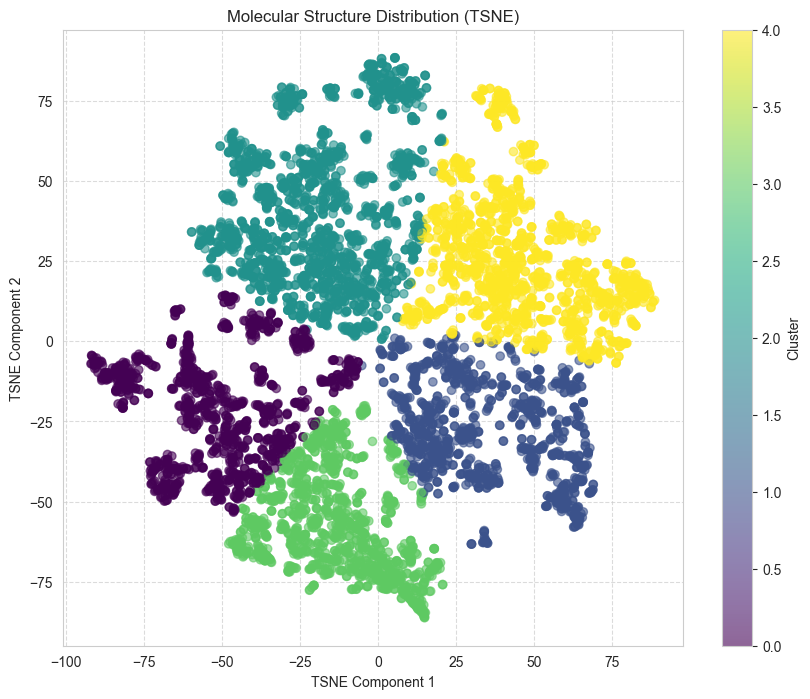


Cluster Statistics:
Cluster 0: 1260 molecules (16.9%)
Cluster 1: 1246 molecules (16.7%)
Cluster 2: 2029 molecules (27.1%)
Cluster 3: 1265 molecules (16.9%)
Cluster 4: 1676 molecules (22.4%)


In [16]:
embedder = 'mol2vec'
# embedder = 'VICGAE'
file_path = processed_data_dirs[0] / f'embedded_vectors/processed_{embedder}_embeddings/processed.X.npy'
print(file_path.exists())
# Visualize using both PCA and t-SNE
visualize_molecular_space(
    file_path=file_path,
    # methods=['pca', 'tsne'],
    methods=['tsne'],
    n_clusters=5,  # Adjust number of clusters as needed
    save_plots=True
)